# `Thera Bank Personal Loan Campaign`

### ***`Data Description: `***

The dataset contains data on 5000 customers. The data include customer demographic
information (age, income, etc.), the customer's relationship with the bank (mortgage, securities
account, etc.), and the customer response to the last personal loan campaign (Personal Loan).
Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to
them in the earlier campaign.


###  ***`Domain: `***
Banking


###  ***`Context:  `*** 

This case is about a bank (Thera Bank) whose management wants to explore ways of converting
its liability customers to personal loan customers (while retaining them as depositors). A
campaign that the bank ran last year for liability customers showed a healthy conversion rate of
over 9% success. This has encouraged the retail marketing department to devise campaigns
with better target marketing to increase the success ratio with a minimal budget.

###  ***`Attribute Information:`***

- ID: Customer ID
- Age: Customer's age in completed years
- Experience: #years of professional experience
- Income: Annual income of the customer (000)
- ZIP Code: Home Address ZIP code.
- Family: Family size of the customer
- CCAvg: Avg. spending on credit cards per month (000)
- Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
- Mortgage: Value of house mortgage if any. (000)
- Personal Loan: Did this customer accept the personal loan offered in the last campaign?
- Securities Account: Doesthe customer have a securities account with the bank?
- CD Account: Doesthe customer have a certificate of deposit (CD) account with the bank?
- Online: Does the customer use internet banking facilities?
- Credit card: Does the customer use a credit card issued by the bank?

## `Learning Outcomes: `

- Exploratory Data Analysis
- Preparing the data to train a model
- Training and making predictions using a classificationmodel
- Model evaluation


###  ***`Objective:`***
The classification goal is to predict the likelihood of a liability customer buying personal loans.


###  ***`Steps and tasks:`***

1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks)
2. EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)
    - Number of unique in each column?
    - Number of people with zero mortgage?
    - Number of people with zero credit card spending per month?
    - Value counts of all categorical columns.
    - Univariate and Bivariate
    - Get data model ready
3. Split the data into training and test set in the ratio of 70:30 respectively (5 marks)
4. Use Logistic Regression model to predict whether the customer will take personal loan or not. Print all the metrics related for evaluating the model performance (15 marks)
5. Check different parameters of Logistic Regression and give your reasoning whether the model performance is affected due to it or not? (10 marks)
6. Give Business understanding of your model? (5 marks)

# <a id = "link101"></a> `Index: `

- <a href = #link102>Question1: Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks)</a>
- <a href = #link103>Question2: EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)</a>
    - <a href = #link104>Number of unique in each column?</a>
    - <a href = #link104>Number of people with zero mortgage?</a>
    - <a href = #link104>Number of people with zero credit card spending per month?</a>
    - <a href = #link104>Value counts of all categorical columns.</a>
    - <a href = #link105>Univariate and Bivariate</a>
    - <a href = #link106>Get data model ready</a>
- <a href = #link107>Question3: Split the data into training and test set in the ratio of 70:30 respectively (5 marks)</a>
- <a href = #link108>Question4: Use Logistic Regression model to predict whether the customer will take personal loan or not. Print all the metrics related for evaluating the model performance (15 marks)</a>
- <a href = #link109>Question5: Check different parameters of Logistic Regression and give your reasoning whether the model performance is affected due to it or not? (10 marks)</a>
- <a href = #link110>Question6: Give Business understanding of your model? (5 marks)</a>

## `Question1` <a id = "link102"></a>

<a href = #link101> Back to Index </a>

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score,accuracy_score

In [2]:
#Read Data
pdata  = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [3]:
#Stastical Analysis
print(pdata.shape)
print("\n")
pdata.info()
print("\n")

(5000, 14)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB




In [4]:
pdata.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [5]:
print("Column Names and number of nulls they contains is as follows:")
print(pdata.isnull().sum()) # Number of nulls in each column of the dataframe
#pdata.isnull().values.any() # This is another way to check if there are any null values in data set

Column Names and number of nulls they contains is as follows:
ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


In [6]:
#Suspicion for incorrect imputation:
#Check the number of customers who don't have credit card (CreditCard = 0) but have non-zero CCAvg

print(pdata[pdata['CreditCard'] == 0][pdata[pdata['CreditCard'] == 0]['CCAvg'] > 0].count())

ID                    3452
Age                   3452
Experience            3452
Income                3452
ZIP Code              3452
Family                3452
CCAvg                 3452
Education             3452
Mortgage              3452
Personal Loan         3452
Securities Account    3452
CD Account            3452
Online                3452
CreditCard            3452
dtype: int64


### <a id = "link1"></a> ***`Observations for Question1:`***

<a href = #link101> Back to Index </a>

- Dataset contains 5000 rows and 14 columns (Used: pdata.shape)
- No nulls observed in the data. There are two columns of datatype float64 (Experience and CCAvg) and remaining are int64 (Used: pdata.info() and pdata.isnull().sum())
- ID looks like a sequence in range 1 to 5000 with a step size of 1.
- Age ranges from 23 to 67, and average of min and max ages is coincidentally the 50%. So the age group seems balanced.
- Minimum experience is negative 3, it may need investigation. **Looks like incorrect imputation**. Ask this question: Check if it is appropriate to drop such cases during data preparation. Can experience be negative?
- Outliers observed in the income column. It seems right skewed.
- Zip code can be a 4 digit or a 5 digit number. Can be checked if 4 digit zipcode is valid to confirm about data quality.
- Around 25% rows in dataset have family size of 1. Same holds true for family sizes 2, 3, and 4 also.
- More than 75% people spend less than or equal to 2.50 using using credit card. 
- More than 50% of the people in the given dataset have education more than 2.
- More than 50% people have zero mortgage.
- Personal Loan, Securities Account, CD Account, Online, and CreditCard all are of type int64. They contain values 0 or 1. So they can be considered as categorical variables. 
- More than 75% of people **haven't** opted for Personal Loan, Securities Account and CD Account.
- More than 50% of people **have** opted for Online.
- Around 25% of people **have** opted for CreditCard.
- There are 3452 people who haven't opted for CreditCard but their CCAvg > 0. This may a result of wrong imputation or it may be possible that these people have credit card from other bank or their credit cards have expired. Needs further investigation. For model building, it is assumed that these people have credit card from other bank or their credit cards have expired

## `Question2` <a id = "link103"></a>

<a href = #link101> Back to Index </a>

In [7]:
pdata.nunique() # Number of unique values in a column

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [8]:
print(pdata[:][pdata[:] == 0].count()) # Number of zeros in a column

ID                       0
Age                      0
Experience              66
Income                   0
ZIP Code                 0
Family                   0
CCAvg                  106
Education                0
Mortgage              3462
Personal Loan         4520
Securities Account    4478
CD Account            4698
Online                2016
CreditCard            3530
dtype: int64


In [9]:
# value counts gives us how many times does the value 
print(pdata['Personal Loan'].value_counts(normalize=True))
print("\n")
print(pdata['Securities Account'].value_counts(normalize=True))
print("\n")
print(pdata['CD Account'].value_counts(normalize=True))
print("\n")
print(pdata['Online'].value_counts(normalize=True))
print("\n")
print(pdata['CreditCard'].value_counts(normalize=True))
print("\n")
print(pdata['Family'].value_counts(normalize=True))
print("\n")
print(pdata['Education'].value_counts(normalize=True))

0    0.904
1    0.096
Name: Personal Loan, dtype: float64


0    0.8956
1    0.1044
Name: Securities Account, dtype: float64


0    0.9396
1    0.0604
Name: CD Account, dtype: float64


1    0.5968
0    0.4032
Name: Online, dtype: float64


0    0.706
1    0.294
Name: CreditCard, dtype: float64


1    0.2944
2    0.2592
4    0.2444
3    0.2020
Name: Family, dtype: float64


1    0.4192
3    0.3002
2    0.2806
Name: Education, dtype: float64


### ***`Observations for Question2:`*** <a id = "link104"></a>

<a href = #link101> Back to Index </a>

Following questions can be answered based on the output of above two cells:

***Number of unique in each column?***
- ID looks like a key column (e.g. primary key, as it's a non-null column with all unique values). Personal Loan, Securities Account, CD Account, Online, and CreditCard all are of type int64 (described above also). They contain **2 unique values**, values 0 or 1. So they can be considered as categorical variables.

***Number of people with zero mortgage?***
- 3462, means more than 69% people haven't opted for mortgage.

***Number of people with zero credit card spending per month?***
- 106.

***Value counts of all categorical columns.***
- *Categorical Columns*: By definition, those columns with Dtype "object" are considered as categorical columns. If we have to strictly follow this definition, and consider the fact that no additional information is provided on how to identify categorical columns, number of categorical columns is zero. However, there are few columns that contain very less unique values. These columns could be considered as categorical columns. Considering this, following **seven** are the categorical columns in this dataset. Value count and frequency of occurrance of each value in these columns is printed above:
1. Personal Loan
2. Securities Account
3. CD Account
4. Online
5. CreditCard
6. Family
7. Education

### ***`Univariate and Bivariate`:*** <a id = "link105"></a>

<a href = #link101> Back to Index </a>

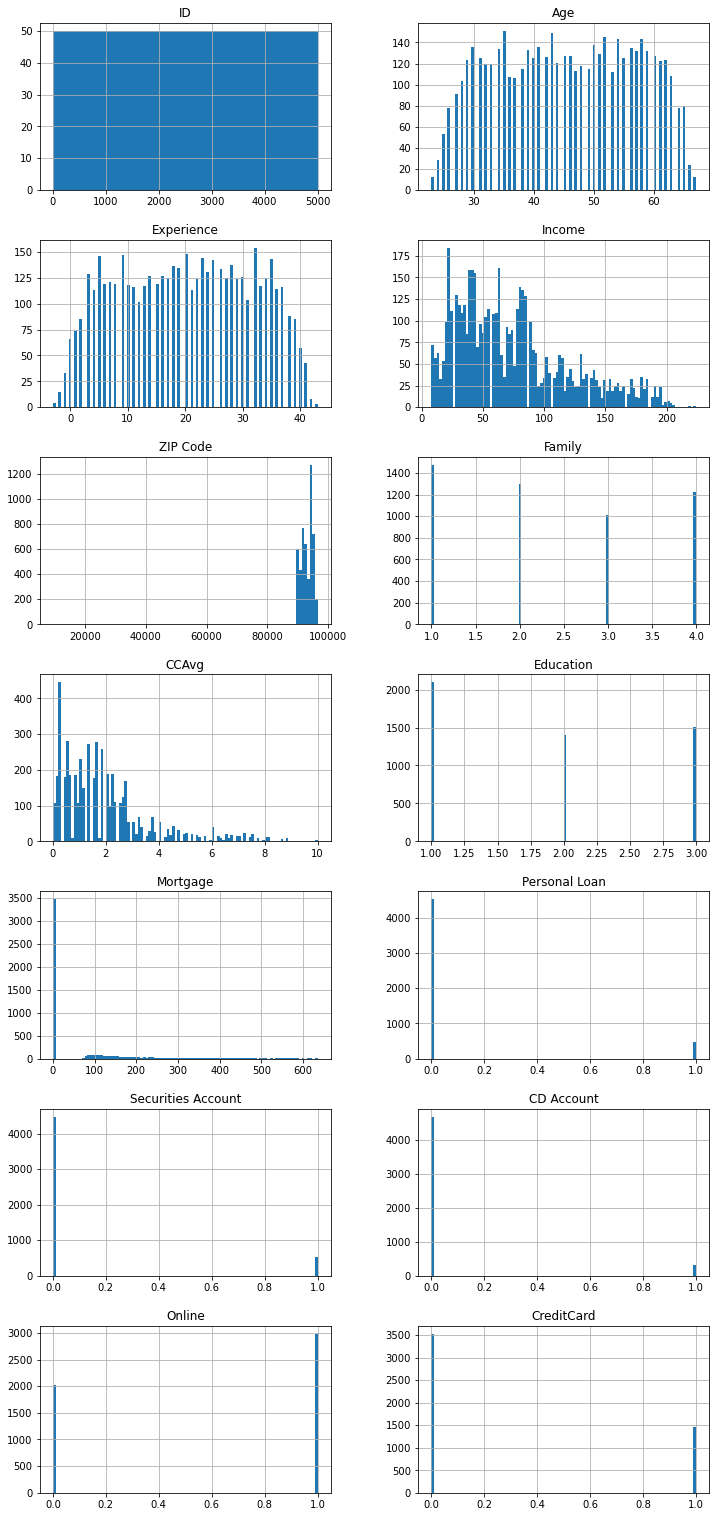

In [10]:
columns = list(pdata)[:]
pdata[columns].hist(stacked=False, bins=100, figsize=(12,55), layout=(14,2)); 

***`Insight:`*** Above histograms substantiate <a href = #link1>Observations for Question1 </a>. To carry out further analysis, and understand how target variable is correlated with other variables (assuming that they are independent), following heat map is plotted.

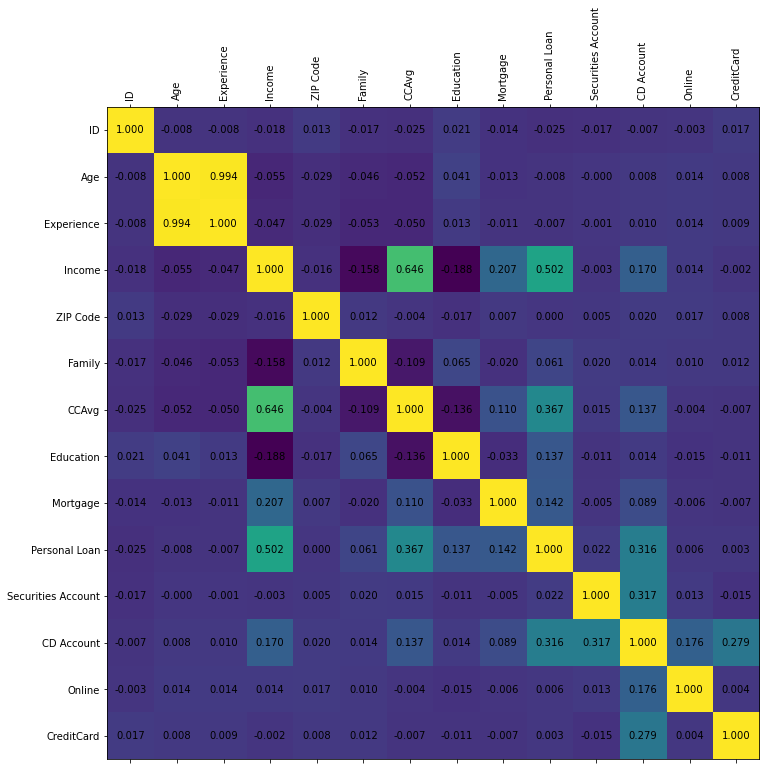

In [11]:
#sns.pairplot(pdata,diag_kind='kde')
pdata.corr().round(3)

# Plotting correlation to analyze how target variable "Personal Loan" is correlated with other variables
def plot_corr(df, size=12):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.3f}'.format(z), ha='center', va='center')

plot_corr(pdata)

***`Observations:`***

Following are the observations on how "Personal Loan" (target variable / Y variable / dependent variable) is correlated with other variables (X-Variables / independent variables):
- ID: Very weak (-ve) correlation.
- Age: Very weak (-ve) correlation. Almost no correlation.
- Experience: Very weak (-ve) correlation. Almost no correlation.
- Income: Fairly +ve correlation (more than 0.5)
- ZIPCode: No correlation. Can be omitted from algorithm.
- Family: Very weak (+ve) correlation.
- CCAvg: Fairly +ve correlation (more than 0.36)
- Education: Somewhat +ve correlation (more than 0.137)
- Mortgage: Somewhat +ve correlation (more than 0.137)
- SecuritiesAccount: Very weak (+ve) correlation.
- CDAccount: Fairly +ve correlation (more than 0.31)
- Online: Very weak (+ve) correlation.
- CreditCard: Very weak (+ve) correlation.

### ***`Bivariate:`***

<a href = #link101> Back to Index </a>

In [12]:
#Overall analysis: Perform analysis of mean values of the column for cases when people took / did not take a personal loan.
pdata.groupby(["Personal Loan"]).mean().T

Personal Loan,0,1
ID,2512.165487,2390.650000
Age,45.367257,45.066667
Experience,20.132301,19.843750
Income,66.237389,144.745833
ZIP Code,93152.428761,93153.202083
Family,2.373451,2.612500
CCAvg,1.729009,3.905354
Education,1.843584,2.233333
Mortgage,51.789381,100.845833
Securities Account,0.102212,0.125000


***`Observations:`*** Income, CCAvg, and Mortgage are higher for people who took personal loan.

In [13]:
#Overall analysis: Perform analysis of median values of the column for cases when people took / did not take a personal loan.
pdata.groupby(["Personal Loan"]).median().T

Personal Loan,0,1
ID,2518.5,2342.0
Age,45.0,45.0
Experience,20.0,20.0
Income,59.0,142.5
ZIP Code,93437.0,93407.0
Family,2.0,3.0
CCAvg,1.4,3.8
Education,2.0,2.0
Mortgage,0.0,0.0
Securities Account,0.0,0.0


***`Observations:`*** Income and CCAvg are higher for people who took personal loan.

In [14]:
#Calculate % of people who took personal loan vs. who didn't take a loan.
n_true = len(pdata.loc[pdata['Personal Loan'] == True])
n_false = len(pdata.loc[pdata['Personal Loan'] == False])
print("Number of true cases: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of false cases: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of true cases: 480 (9.60%)
Number of false cases: 4520 (90.40%)


***`Observations:`*** Less than 10% of people have opted for a personal loan. This confirms the details provided in the problem statement.

## ***`Data Preparation / Get Data Model Ready:`*** <a id = "link106"></a>

<a href = #link101> Back to Index </a>

#### ***`Strategy:`***

Target Variable: Personal Loan
- ID: Drop the column as it has all unique values and it not a continous column. That would not provide any info to the algorithm.
- Age: No imputation needed as it is non-null, non-zero column.
- Experience: Investigate -ve experiences and drop corresponding rows, if possible. Also, if experience is imputed with mean or median experience, there is a probability that we have individuals whose experience is more than their age. So the strategy followed here is:
1. Find age at which people started their employment (age - experience)
2. Find mean of above value
3. Replace 0s with (age - mean found in step2)
- Above strategy for experience has not been implemented here considering that experience has a very weak correlation with the target variable, and also considering that it is effort consuming for the results it brings. 
- ***`Final Decision on Experience:`*** Replace -ve values and zeros with mean.
- Income: No imputation needed as it is non-null, non-zero column.
- ZIP Code: Drop the column as it doesn't contribute towards the target variable.
- Family: Convert into category.
- CCAvg: Replace zeros with mean.
- Education: Convert into category.
- Mortgage: Almost 70% of rows contain zero, which indicates that most people have not opted for mortgage. So no need to impute.
- Securities Account: Convert into category.
- CD Account: Convert into category.
- Online: Convert into category.
- CreditCard: Convert into category.

In [15]:
#Frequency analysis for Experience. This is done because we found some negatives and zeros in this column.
pdata  = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

pdata[pdata['Experience'] <= 0].groupby('Experience')['Experience'].count() 

#pdata[pdata['Experience'] < 0] # In case you need to analyse data on case-by-case basis

Experience
-3     4
-2    15
-1    33
 0    66
Name: Experience, dtype: int64

In [16]:
#First step of data preparation: Drop columns and convert columns to category as per the defined strategy.

#drop columns
pdata.drop(['ID', 'ZIP Code', 'Age'],axis=1,inplace=True)
# dropping ID column as it will be 1-1 mapping anyways
# dropping ZIP Code as it has no correlation with the target variable

#Convert X & Y variable to a categorical variable wherever relevant
#Following are X variables
pdata['Family'] = pdata['Family'].astype('category')
pdata['Education'] = pdata['Education'].astype('category')
pdata['Securities Account'] = pdata['Securities Account'].astype('category')
pdata['CD Account'] = pdata['CD Account'].astype('category')
pdata['Online'] = pdata['Online'].astype('category')
pdata['CreditCard'] = pdata['CreditCard'].astype('category')
#Following is the Y variable
pdata['Personal Loan'] = pdata['Personal Loan'].astype('category')

In [17]:
#Perform Imputation
#from sklearn.impute import SimpleImputer #Import library if not already imported.

##Imputation of Experience
#Assumption: Experience can be either be 0 or +ve. It can't be -ve:

#Step1: Find a list of unique values for Experience column where value is either 0 or negative.
n = pdata[pdata['Experience'] <= 0].Experience.unique()
print(n)

#Step2: Replace every -ve or 0 value with mean
for i in n:
    #print(i)
    rep_0 = SimpleImputer(missing_values=i, strategy="mean")
    cols=['Experience','CCAvg']
    imputer = rep_0.fit(pdata[cols])
    pdata[cols] = imputer.transform(pdata[cols])

#Imputation of CCAvg: Replace 0s with mean
rep_0 = SimpleImputer(missing_values=0, strategy="mean")
cols=['CCAvg']
imputer = rep_0.fit(pdata[cols])
pdata[cols] = imputer.transform(pdata[cols])

[-1  0 -2 -3]


In [18]:
#Perform frequency analysis on Experience again to ensure that all -ve values are imputed.

pdata[pdata['Experience'] <= 0].groupby('Experience')['Experience'].count()

Series([], Name: Experience, dtype: int64)

In [19]:
pdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Experience          5000 non-null   float64 
 1   Income              5000 non-null   int64   
 2   Family              5000 non-null   category
 3   CCAvg               5000 non-null   float64 
 4   Education           5000 non-null   category
 5   Mortgage            5000 non-null   int64   
 6   Personal Loan       5000 non-null   category
 7   Securities Account  5000 non-null   category
 8   CD Account          5000 non-null   category
 9   Online              5000 non-null   category
 10  CreditCard          5000 non-null   category
dtypes: category(7), float64(2), int64(2)
memory usage: 191.3 KB


In [20]:
pdata.nunique()

Experience             47
Income                162
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

In [21]:
print(pdata[:][pdata[:] == 0].count()) # Number of zeros in a column

Experience               0
Income                   0
Family                   0
CCAvg                    0
Education                0
Mortgage              3462
Personal Loan         4520
Securities Account    4478
CD Account            4698
Online                2016
CreditCard            3530
dtype: int64


***`Insight:`***: Data is imputed as per the strategy. In summary, -ve and zeros have been replaced with mean wherever necessary, and data type has been converted to category as and when needed. Now data is ready for further processing

# `Question3` <a id = "link107"></a>

<a href = #link101> Back to Index </a>

In [22]:
#Splitting Data to create training and testing datasets
#from sklearn.model_selection import train_test_split #Import library if not already imported.

#Drop target variable and form X
X = pdata.drop(['Personal Loan','Experience'],axis=1) 
#All columns after imputation except the target variable i.e. Personal Loan

#Only include target variable and form Y
Y = pdata['Personal Loan']
#Target Variable, i.e. Personal Loan (1=True, 0=False)

#Split original data to form 70% training and 30% testing data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
#1 is just any random seed number

x_train.head()

,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
1334,35,2,1.3,1,0,0,0,1,0
4768,39,1,2.0,2,0,0,0,1,0
65,131,1,3.8,1,0,0,0,1,1
177,65,4,1.8,2,244,0,0,0,0
4489,21,3,0.2,2,0,0,0,1,0


In [23]:
#Check the volume of data available in training and testing dataset.

print("{0:0.2f}% data is in training set".format((len(x_train)/len(pdata.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(pdata.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [24]:
#Perform frequency analysis for 'Personal Loan' (values 0s and 1s) in original, training, and testing data

#Original
print("Original Personal Loan True Values    : {0} ({1:0.2f}%)"
      .format(len(pdata.loc[pdata['Personal Loan'] == 1])
              , (len(pdata.loc[pdata['Personal Loan'] == 1])/len(pdata.index)) * 100))
print("Original Personal Loan False Values   : {0} ({1:0.2f}%)"
      .format(len(pdata.loc[pdata['Personal Loan'] == 0])
              , (len(pdata.loc[pdata['Personal Loan'] == 0])/len(pdata.index)) * 100))
print("")

#Training
print("Training Personal Loan True Values    : {0} ({1:0.2f}%)"
      .format(len(y_train[y_train[:] == 1])
              , (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Personal Loan False Values   : {0} ({1:0.2f}%)"
      .format(len(y_train[y_train[:] == 0])
              , (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")

#Testing
print("Test Personal Loan True Values        : {0} ({1:0.2f}%)"
      .format(len(y_test[y_test[:] == 1])
              , (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Personal Loan False Values       : {0} ({1:0.2f}%)"
      .format(len(y_test[y_test[:] == 0])
              , (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Personal Loan True Values    : 480 (9.60%)
Original Personal Loan False Values   : 4520 (90.40%)

Training Personal Loan True Values    : 331 (9.46%)
Training Personal Loan False Values   : 3169 (90.54%)

Test Personal Loan True Values        : 149 (9.93%)
Test Personal Loan False Values       : 1351 (90.07%)



***`Insight:`*** True and False values seem properly balanced in training and testing datasets.

## `Question4` <a id = "link108"></a>

<a href = #link101> Back to Index </a>

### ***`Understanding which model fits better for the dataset:`*** 

#### ***`Approach:`***
- Keep C as default (0.5).
- Test all the solvers and check which one provides better train and test scores.
- Test first for penalty = 'l2' and then for those models which work only with penalty = 'l1'
- **Note**: max_iter is changed to 10000 from it's default value of 100. Because if it is below 5000, warnings are observed.

In [25]:
train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=1,penalty='l2', solver=i,max_iter=10000)  # changing values of solver
    model.fit(x_train, y_train) 
    y_predict = model.predict(x_test)     
    train_score.append(round(model.score(x_train, y_train),3))
    test_score.append(round(model.score(x_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.951, 0.951, 0.951, 0.927, 0.917]

[0.948, 0.948, 0.947, 0.921, 0.909]


***`Insight:`*** It appears that all models have good train and test scores. No underfit or overfit models observed. But 'newton-cg' and 'lbfgs' have the best scores for penalty = 'l2'.

In [26]:
#Perform same steps as above, but keep penalty = 'l1'. In this case, only those solvers which work with 'l1' are considered.
train_score=[]
test_score=[]
solver = ['liblinear','saga']   # changing values of solver which works with 'l1'
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l1', solver=i,max_iter=10000)  #changed penalty to 'l1'
    model.fit(x_train, y_train) 
    y_predict = model.predict(x_test)     
    train_score.append(round(model.score(x_train, y_train),3))
    test_score.append(round(model.score(x_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['liblinear', 'saga']

[0.952, 0.918]

[0.949, 0.909]


***`Insight:`*** It appears that 'liblinear' with 'l1' has the same scores as 'newton-cg' and 'lbfgs' with l2. Therefore, perform additional analysis on these three models with different values of C. Also, no underfit or overfit models observed. 

In [27]:
#Step1: Analysis for liblinear with l1

print("solver = liblinear, penalty = l1:")
train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state=42,penalty='l1',solver='liblinear',max_iter=10000,C = i)
    model.fit(x_train, y_train) 
    y_predict = model.predict(x_test)     
    train_score.append(round(model.score(x_train,y_train),3)) 
    # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(x_test, y_test),3))   
    # appending testing accuracy in a blank list for every run of the loop
    
print(C)
print(train_score)
print(test_score)


#Step2: Analysis for newton-cg with l2

print("\nsolver = newton-cg, penalty = l2:")
train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state=42,penalty='l2',solver='newton-cg',max_iter=10000,C = i)
    model.fit(x_train, y_train) 
    y_predict = model.predict(x_test)     
    train_score.append(round(model.score(x_train,y_train),3)) 
    # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(x_test, y_test),3))   
    # appending testing accuracy in a blank list for every run of the loop
    
print(C)
print(train_score)
print(test_score)

#Step3: Analysis for lbfgs with l2

print("\nsolver = lbfgs, penalty = l2:")
train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state=42,penalty='l2',solver='newton-cg',max_iter=10000,C = i)
    model.fit(x_train, y_train) 
    y_predict = model.predict(x_test)     
    train_score.append(round(model.score(x_train,y_train),3)) 
    # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(x_test, y_test),3))   
    # appending testing accuracy in a blank list for every run of the loop
    
print(C)
print(train_score)
print(test_score)

solver = liblinear, penalty = l1:
[0.01, 0.1, 0.25, 0.5, 0.75, 1]
[0.903, 0.947, 0.95, 0.951, 0.952, 0.952]
[0.899, 0.947, 0.948, 0.947, 0.948, 0.949]

solver = newton-cg, penalty = l2:
[0.01, 0.1, 0.25, 0.5, 0.75, 1]
[0.939, 0.949, 0.951, 0.95, 0.951, 0.951]
[0.933, 0.947, 0.949, 0.949, 0.949, 0.948]

solver = lbfgs, penalty = l2:
[0.01, 0.1, 0.25, 0.5, 0.75, 1]
[0.939, 0.949, 0.951, 0.95, 0.951, 0.951]
[0.933, 0.947, 0.949, 0.949, 0.949, 0.948]


### <a id = "link2"></a> ***`Conclusion on Model Selection:`*** 

Based on all the above observations, the model chosen is as follows:
- Solver = liblinear. No significant differences in scores found when compared the scores of the shortlisted solvers. However, the definition of ***LogisticRegression function in Python*** suggests that for smaller datasets, liblinear is a good choice. Considering these two factors, liblinear is chosen.
- C= 1. Provides the best score for all solvers, including liblinear, which is our choice of solver.
- Penalty= l1. liblinear showed better scores with l1 than l2.
- max_iter=10000: If default value is not changed, we get warning: "the coef_ did not converge", ConvergenceWarning

<a href = #link101> Back to Index </a>

In [28]:
#Train and test data using the model of our choice:
# Fit the model on train
model = LogisticRegression(random_state=42,penalty='l1',solver='liblinear',max_iter=10000,C = 1)
model.fit(x_train, y_train)

#predict on test
y_predict = model.predict(x_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0        1         2        3         4         5         6  \
0  0.051407  0.68032  0.152468  1.61333  0.000725 -0.975321  3.542346   

          7         8  intercept  
0 -0.562294 -1.041981 -12.891886  


In [29]:
model_score = model.score(x_test, y_test)
print(model_score)

0.9493333333333334


<AxesSubplot:>

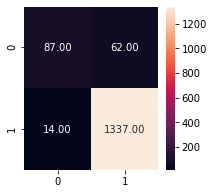

In [30]:
#Print confusion matrix:

cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (3,3))
sns.heatmap(df_cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )

In [31]:
#Print performance indicators for the model

print("Recall:",recall_score(y_test,y_predict))
print("Precision:",precision_score(y_test,y_predict))
print("F1 Score:",f1_score(y_test,y_predict))
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

Recall: 0.5838926174496645
Precision: 0.8613861386138614
F1 Score: 0.6960000000000001
Roc Auc Score: 0.7867649615745731


***`Insight:`*** Recall is comparatively lower. But low recall seems a good option in this case. This is because the outcome of this model might be used for target campaigning. If so, then customers who fall in True-Positive, False-Positive, and False-Negative can be potential customers that may take personal loans. Here, business will benefit from False-Positives and False-Negative cases. And True-Negatives are can be excluded from the campaign. 

<a href = #link101> Back to Index </a>

## `Question5` <a id = "link109"></a>

<a href = #link101> Back to Index </a>

In [32]:
#Get the parameters for logistic regression
model.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 10000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l1',
 'random_state': 42,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

### ***`Insights:`*** 

For additional reference and definition of parameters, visit: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Following are the model parameters and their impact on model performance:

- **`'C':`** Much on it is discussed in the section: <a href = #link2>Conclusion on Model Selection</a>. In this case, higher is the 'C', better was the model.


- **`'class_weight':`** Default value is None. If value *balanced* is used, it decreases the model scores and precision of the model.


- **`dual:`** Default value is False. True is not supported for the choice of model. Got ValueError: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=True, Parameters: penalty='l1', loss='logistic_regression', dual=True


- **`fit_intercept:`** Default value is True. When False was selected, model performance reduced drastically (Test Score: 0.88, Recall: 0.19463087248322147, Precision: 0.3258426966292135, F1 Score: 0.24369747899159666, Roc Auc Score: 0.5751096627405005)


- **`intercept_scaling:`** Default value is 1. This parameter makes sense only when *fit_intercept* is true. It could be observed that model shows best performance when this value is around 1. As the value increases or decreases, the model performance also increased or decreased gradually. For values having large differences with 1, the model performance was drastically low.


- **`'l1_ratio':`** Default value is None. This is used only when `penalty='elasticnet'`. Therefore, this parameter's influence on the model was not tested.


- **`'max_iter':`** Default value is 100. Much on it is discussed in the section:`<a href = #link2>Conclusion on Model Selection</a>.


- **`'multi_class':`** Default value is 'auto'. Other two values are `'ovr' and 'multinomial'`. 'multinomial' is unavailable when solver='liblinear'. 'auto' selects 'ovr' if the data is binary, or if solver='liblinear', and otherwise selects 'multinomial'. No further testing needed since our solver='liblinear'.


- **`'n_jobs':`** Default value is None. Works when multi_class='ovr'. However, parameter is ignored when the solver is set to 'liblinear'. Got warning:`UserWarning:` 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.


- **`'penalty':`** Default value is 'l2'. Much on it is discussed in the section:`<a href = #link2>Conclusion on Model Selection</a>.


- **`'random_state':`** Default value is None. Most popular values are 0 and 42. No significant impact on model performance observed when model was tested using values None, 0, 1, 42, and 10000.


- **`'solver':`** Default value is 'lbfgs'. Much on it is discussed in the section:`<a href = #link2>Conclusion on Model Selection</a>.


- **`'tol':`** Default value is 1e-4. When increased to 0.01, model performance reduced slightly. (Test Score: 0.942, Recall: 0.5033557046979866, Precision: 0.8522727272727273, F1 Score: 0.6329113924050633, Roc Auc Score: 0.7468666014237528)


- **`'verbose':`** Default value is 0. Can take any positive integer value and works only with 'liblinear' and 'lbfgs' solvers for verbosity. No significant impact on model performance observed when model was tested using values 0, 1, and 10000.


- **`'warm_start':`** Default value is False. When set to True, no impact on model performance as it is useless for liblinear solver.

<a href = #link101> Back to Index </a>

## `Question6` <a id = "link110"></a>

<a href = #link101> Back to Index </a>

### <a id = "link8"></a>`Business Insights:`

`Confusion matrix means`

*True Positive (observed=1,predicted=1):*

Predicted that Personal Loan will be opted by the customer and the customer actually opted for the loan.

*False Positive (observed=0,predicted=1):*

Predicted that Personal Loan will be opted by the customer but the customer didn't opt for the loan.

*True Negative (observed=0,predicted=0):*

Predicted that Personal Loan will not be opted by the customer and the customer didn't opt for the loan.

*False Negative (observed=1,predicted=0):*

Predicted that Personal Loan will not be opted by the customer but the customer opted for the loan.

By giving personal loans to the customers, bank can earn good amount of profit by investing less for a limited period of time. Therefore, most banks have dedicated departments who try to contact potential customers that may opt for a personal loan. Therefore, assuming that the outcome of this model will be used for contacting potential customers or running a campaign to promote personal loan, we want to develop a model in such a way that it will have **less number of True Negatives**. Remaining all customers can be considered as potential borrowers. Bank doesn't want to lose potential customers for Personal Loans. Hence **Precision is the important metric**. Also, **Recall should be a low number**.

In case of False Positives, bank may end up spending additional effort on contacting those customers who might not be interesting in opting for a loan. However, this effort is minimal as compared to the potential benefit that can rise due to some customers from this category actually opting for a personal loan.

<a href = #link101> Back to Index </a>